# HW 15 Report Minh Nguyen

In [18]:
import os
import matplotlib.pyplot as plt
import torch
from torch.nn.functional import cosine_similarity

from PIL import Image
from transformers import BlipForQuestionAnswering, AutoProcessor, BlipModel

In [19]:
# BLIP for Question Answering
model = BlipForQuestionAnswering.from_pretrained("Salesforce/blip-vqa-base")
processor = AutoProcessor.from_pretrained("Salesforce/blip-vqa-base")

# BLIP model
blip_model = BlipModel.from_pretrained("Salesforce/blip-image-captioning-base")
blip_processor = AutoProcessor.from_pretrained("Salesforce/blip-image-captioning-base")

/Users/ndminh/miniconda3/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
`BlipModel` is going to be deprecated in future release, please use `BlipForConditionalGeneration`, `BlipForQuestionAnswering` or `BlipForImageTextRetrieval` depending on your usecase.
Some weights of BlipModel were not initialized from the model checkpoint at Salesforce/blip-image-captioning-base and are newly initialized: ['logit_scale', 'text_model.embeddings.LayerNorm.bias', 'text_model.embeddings.LayerNorm.weight', 'text_model.embeddings.position_embeddings.weight', 'text_model.embeddings.word_embeddings.weight', 'text_model.encoder.layer.0.attention.output.LayerNorm.bias', 'text_mode

/Users/ndminh/miniconda3/lib/python3.12/site-packages/transformers/generation/utils.py:1258: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


keyboard


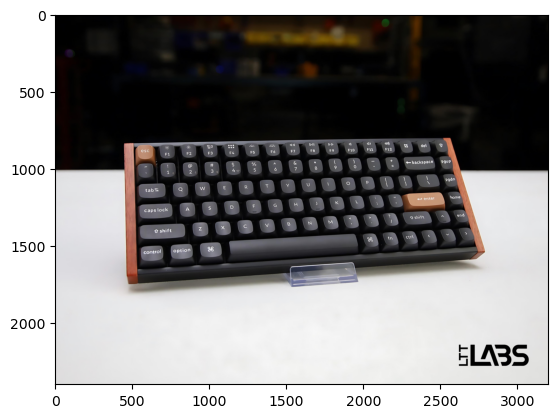

In [4]:
img_path = "inputs/keyboard.png"
image = Image.open(img_path)

question = "What is contained in the image?"

inputs = processor(images=image, text=question, return_tensors="pt")
outputs = model.generate(**inputs)

# print the image
plt.imshow(image)

print(processor.decode(outputs[0], skip_special_tokens=True))

In [20]:
query = "Is this an image of a car?"

# process the images from inputs folder
inputs_folder = "inputs/"
images = []

for filename in os.listdir(inputs_folder):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        img = Image.open(os.path.join(inputs_folder, filename))
        images.append(img)

        # process with query
        inputs = processor(images=img, text=query, return_tensors="pt")
        outputs = model.generate(**inputs)

        print(f"Image: {filename}")
        print(f"Answer: {processor.decode(outputs[0], skip_special_tokens=True)}")

/Users/ndminh/miniconda3/lib/python3.12/site-packages/transformers/generation/utils.py:1258: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Image: car2.jpg
Answer: yes
Image: car3.jpg
Answer: yes
Image: car1.jpg
Answer: yes
Image: ball.jpg
Answer: no
Image: keyboard.png
Answer: no
Image: cleat.jpg
Answer: no
Image: stadium.jpg
Answer: no
Image: house.jpg
Answer: no
Image: mouse.jpg
Answer: no
Image: macbook.jpg
Answer: no


In [39]:
def compute_relevant_score(query, image):
    inputs = blip_processor(images=image, text=query, return_tensors="pt")
    outputs = blip_model(**inputs)
    logits_per_image = outputs.logits_per_image
    logits_per_text = outputs.logits_per_text
    # probs = logits_per_image.softmax(dim=1)
    # print("Logits:", logits_per_image[0][0].item())
    # print("Probs:", probs[0][0].item())

    # return logits_per_image[0][0].item()
    return logits_per_text[0][0].item()

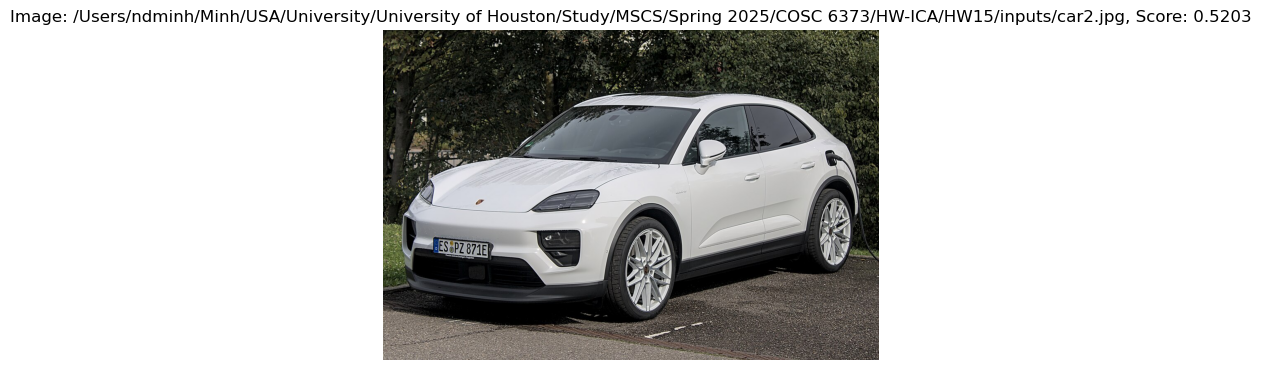

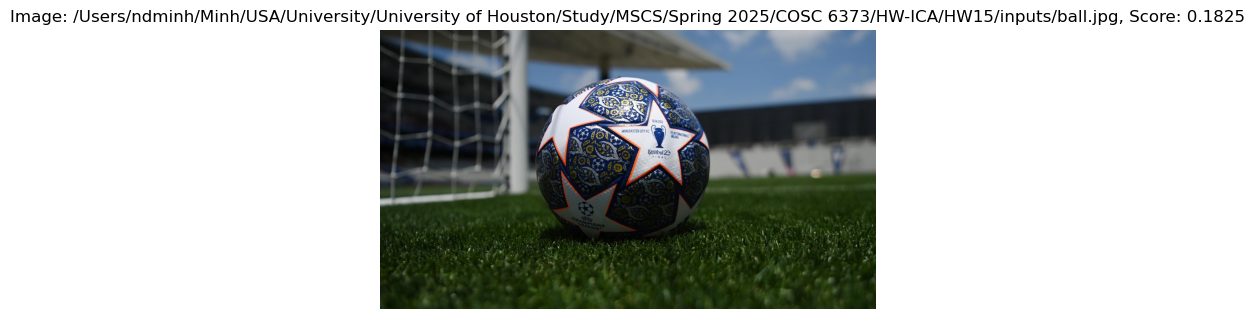

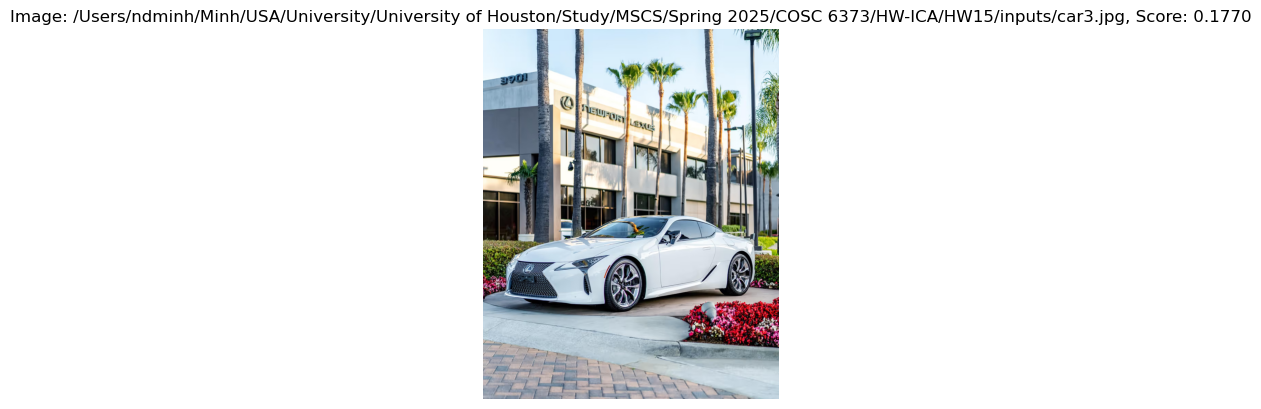

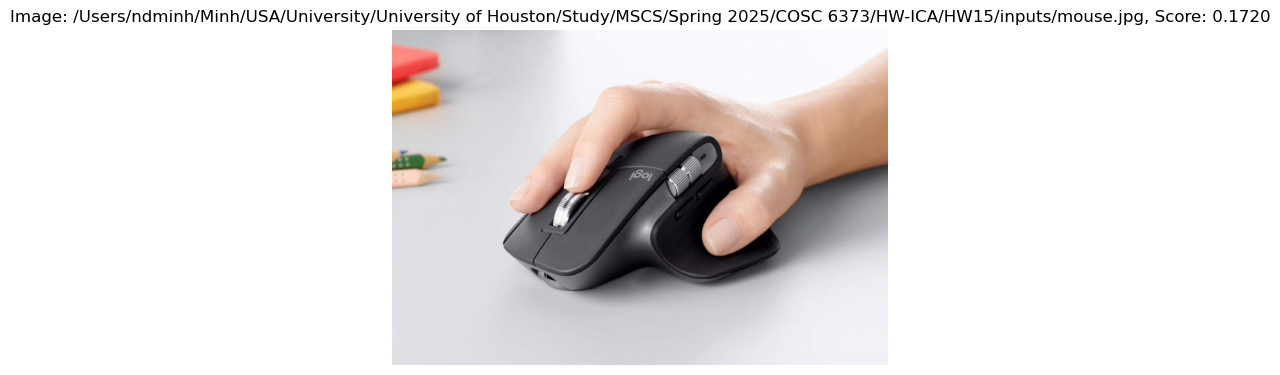

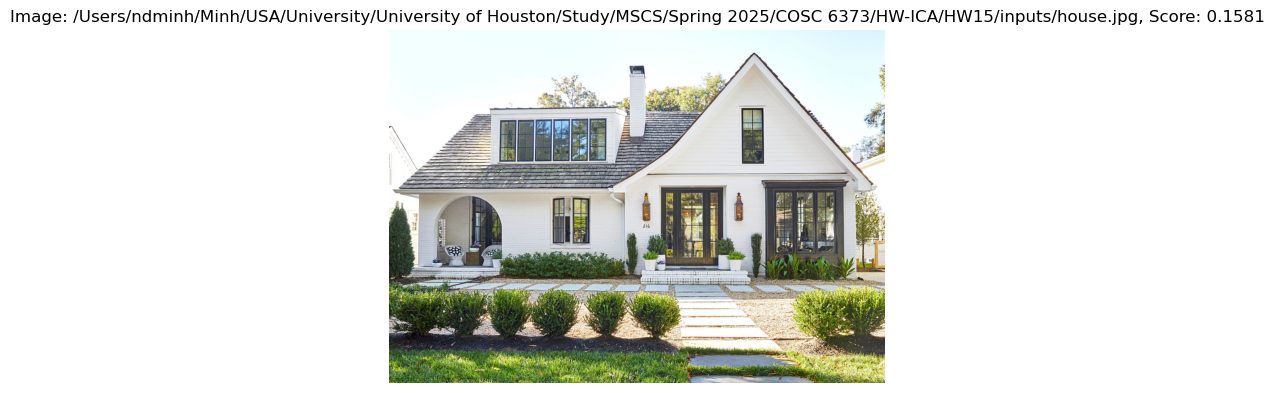

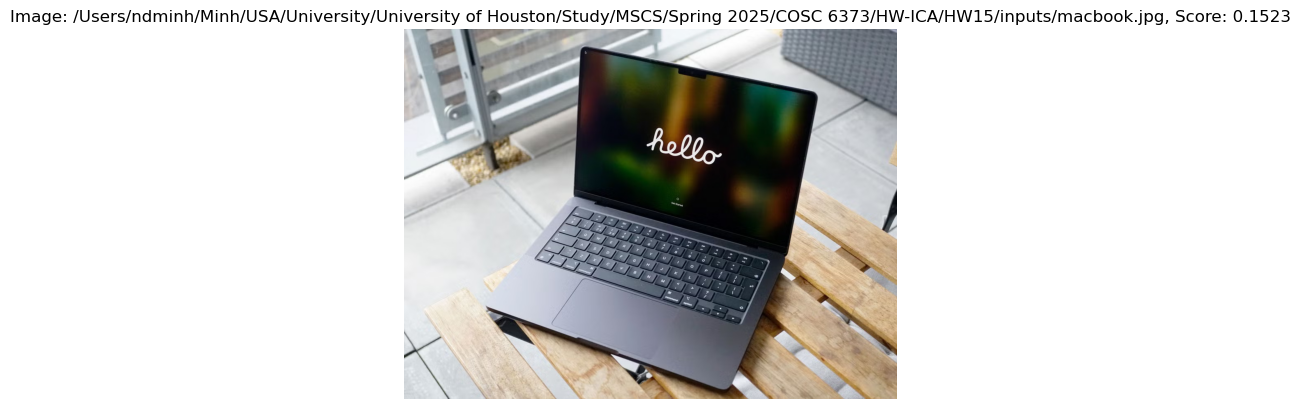

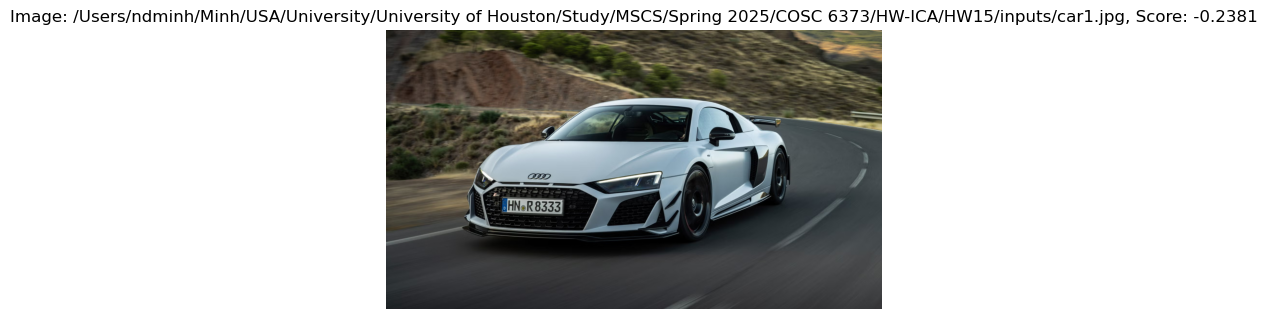

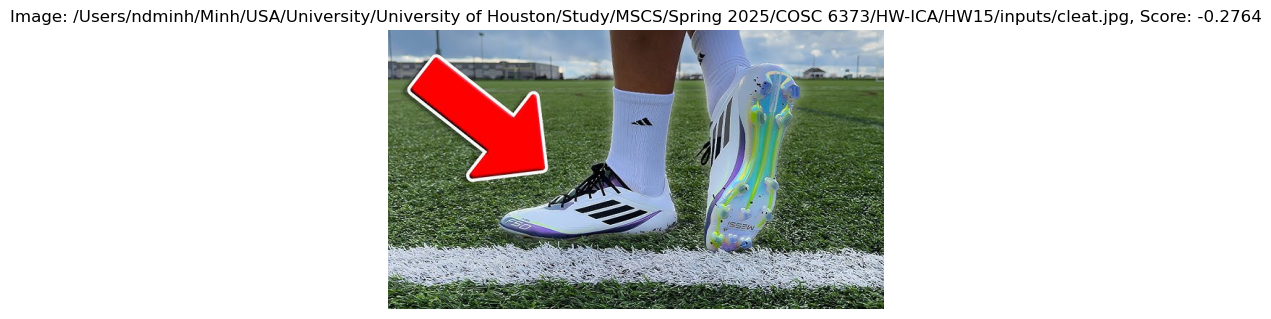

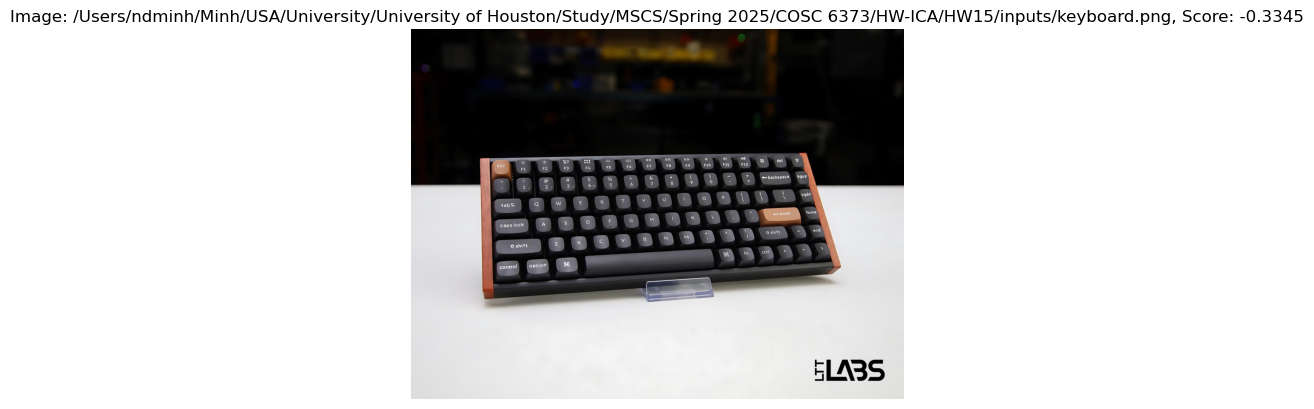

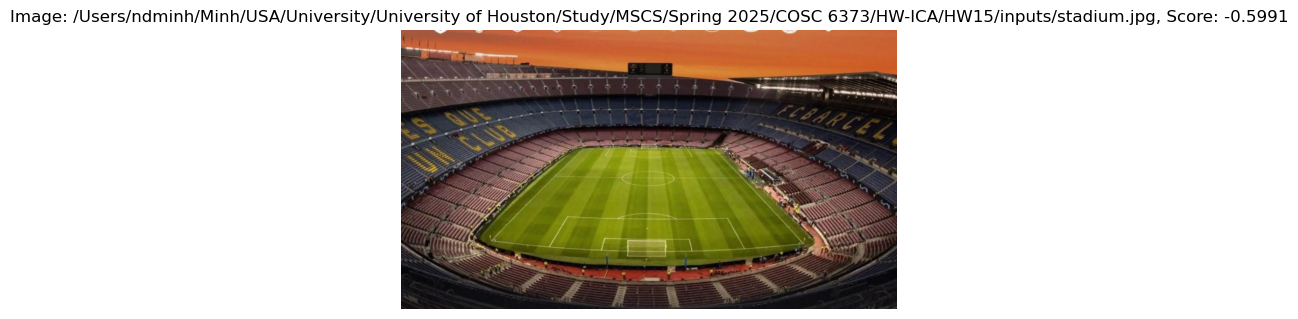

In [ ]:
# I tried with a different query (instead of a question, I used a caption-like query)
query_1 = "An image of a car"

relevant_score_map = {}
for img in images:
    score = compute_relevant_score(query_1, img)
    relevant_score_map[img.filename] = score

# Sort the images based on the relevant score
sorted_images = sorted(relevant_score_map.items(), key=lambda x: x[1], reverse=True)
# Display the sorted images
for img_name, score in sorted_images:
    img = Image.open(os.path.join(inputs_folder, img_name))
    plt.imshow(img)
    plt.title(f"Image: {img_name}, Score: {score:.4f}")
    plt.axis('off')
    plt.show()


### Comments:
- To perform a performance evaluation of the BLIP model for the task described above, I would need to run the model on a dataset of images, with a set of corresponding captions (or queries) for each image. Then we can compute the similarity scores between the generated captions and the ground truth captions, and use these scores to evaluate the performance of the model.
- From there, we can compute the precision, recall, F1 score, or other metrics for the model's performance.